In [ ]:
import mglearn
from matplotlib import pyplot as plt

mglearn.plots.plot_nmf_illustration()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
import numpy as np
from matplotlib import pyplot as plt

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask] 
y_people = people.target[mask]

X_people = X_people / 255.

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)
plt.show()

In [ ]:
from sklearn.decomposition import NMF
from matplotlib import pyplot as plt

nmf = MNF(n_components=15, random_state=0)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title(f"{i} component")

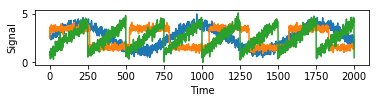

In [11]:
import mglearn
from matplotlib import pyplot as plt

# 3つの信号が重なり合った状態とする
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel('Time')
plt.ylabel('Signal')
plt.show()

Shape of measurements: (2000, 100)
Recovered signal shape: (2000, 3)


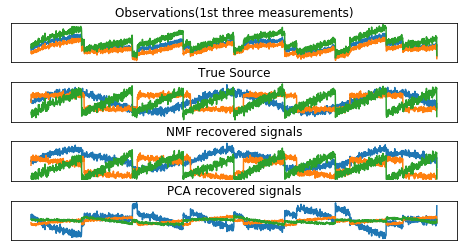

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import NMF
from sklearn.decomposition import PCA
# データを混ぜて100次元の状態を作成する
A = np.random.RandomState(0).uniform(size=(100, 3))

X = np.dot(S, A.T)
print(f"Shape of measurements: {X.shape}") #測定データの形状

nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print(f"Recovered signal shape: {S.shape}") #再構成された元信号データの形状

pca = PCA(n_components=3)
H = pca.fit_transform(X)

models = [X, S, S_, H]
names = ['Observations(1st three measurements)', 'True Source', 'NMF recovered signals', 'PCA recovered signals']

fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5}, subplot_kw={'xticks':(), 'yticks':()})

# NMFが生成すえう成分には順番がない
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')
# 分解手法は様々あるため、sckit-learnの分解手法のページを見ると良い